# 07_diffusion_absorption

In [1]:
import fenics as fe
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.size']=18

## Parameters to set

In [2]:
r_in = 10 # inner radius
r_out = 100 # outer radius

## Import and plot the mesh, define boundaries

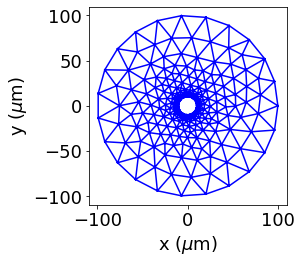

In [3]:
'''The xml mesh is created by saving the mesh (created in gmsh) in gmsh as ASCII v2. 
This is then converted into xml using dolfin-convert model.msh model xml.'''

# import the mesh
mesh = fe.Mesh('model.xml') 

# import the physical surface and the labelled boundaries
markers = fe.MeshFunction("size_t", mesh, 'model_physical_region.xml') 
boundaries = fe.MeshFunction('size_t', mesh, 'model_facet_region.xml')

# set the integration path
dx = fe.Measure('dx', domain=mesh, subdomain_data=markers)
ds = fe.Measure('ds',domain=mesh,subdomain_data=boundaries)

# define the function space, first order elements are usual for the PE
V = fe.FunctionSpace(mesh, 'CG', 1)

# set the boundary conditions and put them in a list
inner = fe.DirichletBC(V, fe.Constant(0), boundaries, 4)
outer = fe.DirichletBC(V, fe.Constant(1), boundaries, 5)
bcs =[inner,outer]

# plot the grid
fe.plot(mesh,color='b');
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
plt.tight_layout()
plt.savefig('mesh.png',dpi=150)

## Solve the Poisson equation

In [4]:
u = fe.TrialFunction(V)
v = fe.TestFunction(V)
a = fe.dot(fe.grad(u), fe.grad(v)) * dx
L = fe.Constant('0') * v * dx
u = fe.Function(V)
fe.solve(a == L, u,bcs)

## Plot the simulation

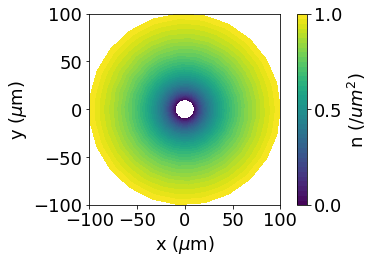

In [5]:
myplot = fe.plot(u)
u([100,0])
plt.xlim([-100,100])
plt.ylim([-100,100])
plt.xticks([-100,-50,0,50,100]);
plt.yticks([-100,-50,0,50,100]);
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
a = plt.colorbar(myplot)
a.set_label('n (/$um^2$)')
a.set_ticks([0,0.5,1])
plt.tight_layout()
plt.savefig('n.png',dpi=150)

## Compare the simulation to the analytic result

The L2 norm for the linetrace is 0.002349


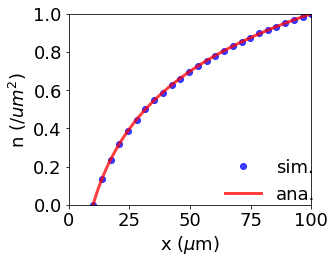

In [6]:
# avoid hitting points outside the domain
tol = 0.001  

# take a linetrace through the data
x = np.linspace(r_in + tol, r_out - tol, 101)
points = [[x_, 0] for x_ in x]  # 2D points
u_line = np.array([u(point) for point in points])

# determine the analytic result
A = 1/np.log(r_out/r_in)
B = np.log(r_in)/(np.log(r_in)-np.log(r_out))
u_sim = A*np.log(x)+B

# plot the result
fig,ax = plt.subplots(1,1,figsize= [5,4])
ax.set_xlim([0,100])
ax.set_ylim([0,1])
plt.xlabel('x ($\mu$m)')
plt.ylabel('n (/$um^2$)')
ax.plot(x[::4],u_line[::4],'.',color='b',alpha=0.75,markersize=12,label = 'sim.')
ax.plot(x,u_sim,color='r',alpha=0.75,linewidth=3,label='ana.')
fig.legend(frameon=False, loc=[0.65,0.2])
fig.tight_layout()
plt.savefig('sim_ana.png',dpi=150)

# take the L2 norm
L2norm = np.sqrt(np.sum((u_sim-u_line)**2)/np.sum(u_sim**2))
print('The L2 norm for the linetrace is {:0.6f}'.format(L2norm))

## Generate featured image

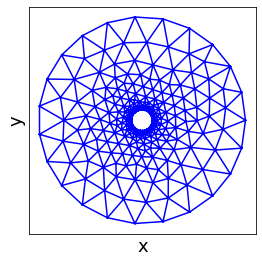

In [7]:
# plot the grid


fe.plot(mesh,color='b');
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('mesh_feat.png',dpi=150)